# Maximizing Conversion: A/B Testing Insights for Optimal Marketing Strategies

## Table of Contents

* Introduction
* Setup
* Assessing Data
* Cleaning Data
* Exploratory Data Analysis
* Probability
* Hypothesis Testing
* Conclusion

## Introduction

Two ad campaigns were run by a company and now wants to know which campaign performed better in converting website clicks into purchases.



|Feature| |Description|
--- | --- | ---|
|Campaign Name|	|Name of the campaign|
|Date|	|Date of the campaign|
|Spend [USD]|	|Amount spent on the campaign in USD|
|Reach|	|Unique impressions the ad made|
|# of Impressions|	|Impressions the ad made through the campaign|
|# of Website Clicks|	|Website clicks received through the ad|
|# of Searches|	|Number of users who performed searches on the website|
|# of View Content|	|Number of users who viewed content and products on the website|
|# of Add to Cart|	|Number of users who added products to the cart|
|# of Purchase|	|Number of purchases|

### Hypotheses

**Null hypothesis**: The conversion rate for the test campaign is equal to or less than the conversion rate for the control campaign.

**Alternative hypothesis**: The conversion rate for the test campaign is greater than the conversion rate for the control campaign.

Conversion rate for this analysis will be defined as the number of purchases divided by the number of website clicks.

Type 1 error rate of 5%

## Setup

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
# Get data for test group
test_df = pd.read_csv("test_group.csv", sep=";")

test_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [3]:
# Get data for control group
control_df = pd.read_csv("control_group.csv", sep=";")

control_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test_df.shape

(30, 10)

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [6]:
# check for duplicated columns
test_df.duplicated().sum()

0

In [7]:
# check for duplicates in test_df

def check_for_dupes(data, col):
    

    """
    Checks for duplicate values in each column of a dataset (dupe or dupes)
    Returns column name, number of duplicated values, and list of duplicated values with frequency of each value (if applicable)

    Parameter
    -----------
    data : DataFrame
    col : Series from DataFrame
    """
    
    dupe_count = data[col].duplicated().sum()
    
    if dupe_count == 0:
        return f"{col} has {dupe_count} duplicates"
    elif dupe_count == 1:
        return f"{col} has {dupe_count} duplicates dupe:{data[col].value_counts()} \n"
    else:
        return f"{col} has {dupe_count} duplicates \n dupe:{data[col].value_counts()} \n"



for columns in test_df.columns:
    print(f"{check_for_dupes(test_df, columns)}",'\n','\n', '..............................', '\n', '\n')


Campaign Name has 29 duplicates 
 dupe:Campaign Name
Test Campaign    30
Name: count, dtype: int64 
 
 
 .............................. 
 

Date has 0 duplicates 
 
 .............................. 
 

Spend [USD] has 0 duplicates 
 
 .............................. 
 

# of Impressions has 0 duplicates 
 
 .............................. 
 

Reach has 0 duplicates 
 
 .............................. 
 

# of Website Clicks has 0 duplicates 
 
 .............................. 
 

# of Searches has 1 duplicates dupe:# of Searches
1995    2
1946    1
2661    1
1920    1
2432    1
2976    1
2037    1
2937    1
2687    1
2592    1
1983    1
2061    1
2924    1
2824    1
2537    1
2359    1
1979    1
2213    1
2081    1
2893    1
2312    1
2899    1
2867    1
2733    1
1854    1
2106    1
2216    1
2572    1
2978    1
Name: count, dtype: int64 
 
 
 .............................. 
 

# of View Content has 0 duplicates 
 
 .............................. 
 

# of Add to Cart has 0 duplicates 
 
 .

In [8]:
control_df.shape

(30, 10)

In [9]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [10]:
for columns in control_df.columns:
     print(f"{check_for_dupes(test_df, columns)}",'\n','\n', '..............................', '\n', '\n')

Campaign Name has 29 duplicates 
 dupe:Campaign Name
Test Campaign    30
Name: count, dtype: int64 
 
 
 .............................. 
 

Date has 0 duplicates 
 
 .............................. 
 

Spend [USD] has 0 duplicates 
 
 .............................. 
 

# of Impressions has 0 duplicates 
 
 .............................. 
 

Reach has 0 duplicates 
 
 .............................. 
 

# of Website Clicks has 0 duplicates 
 
 .............................. 
 

# of Searches has 1 duplicates dupe:# of Searches
1995    2
1946    1
2661    1
1920    1
2432    1
2976    1
2037    1
2937    1
2687    1
2592    1
1983    1
2061    1
2924    1
2824    1
2537    1
2359    1
1979    1
2213    1
2081    1
2893    1
2312    1
2899    1
2867    1
2733    1
1854    1
2106    1
2216    1
2572    1
2978    1
Name: count, dtype: int64 
 
 
 .............................. 
 

# of View Content has 0 duplicates 
 
 .............................. 
 

# of Add to Cart has 0 duplicates 
 
 .

None of the dates are duplicated so each of the record can be considered unique. Other values can be duplicated since it is possible have duplicated values for the other columns.

### Quality Issues

```test_df table```

The date column is an object, not a datetime


```control_df table```

The date column is an object, not a datetime
Convert float datatypes to int datatypes
Missing data for the August 5th record


### Tidiness Issues

* Update column names to remove spaces and easier readability
* Merge both the datasets into one dataset

## Cleaning Data

In [11]:
test_clean = test_df.copy()
control_clean = control_df.copy()

### Clean test_clean

Issue: Incorrect data type
Define:

Convert Date values to datetime using to_datetime()
Code:

In [12]:
test_clean.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [13]:
# Convert Date to DateTime type
test_clean["Date"] = pd.to_datetime(test_clean["Date"], format="%d.%m.%Y")

In [14]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign Name        30 non-null     object        
 1   Date                 30 non-null     datetime64[ns]
 2   Spend [USD]          30 non-null     int64         
 3   # of Impressions     30 non-null     int64         
 4   Reach                30 non-null     int64         
 5   # of Website Clicks  30 non-null     int64         
 6   # of Searches        30 non-null     int64         
 7   # of View Content    30 non-null     int64         
 8   # of Add to Cart     30 non-null     int64         
 9   # of Purchase        30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB


In [15]:
test_clean.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


### Issue: 

Column names


Column names should be updated to remove spaces and special characters

In [16]:
test_clean = test_clean.rename(columns={
    "Campaign Name": "campaign_name",
    "Date": "date",
    "Spend [USD]": "spend_usd",
    "# of Impressions": "impressions",
    "Reach": "reach",
    "# of Website Clicks": "website_clicks",
    "# of Searches" : "searches",
    "# of View Content": "view_content",
    "# of Add to Cart": "added_to_cart",
    "# of Purchase": "purchases"
})

test_clean.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,added_to_cart,purchases
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


In [17]:
test_clean.isna().sum()

campaign_name     0
date              0
spend_usd         0
impressions       0
reach             0
website_clicks    0
searches          0
view_content      0
added_to_cart     0
purchases         0
dtype: int64

### Clean control_clean


Column names should be updated to remove spaces and special characters

In [18]:
control_clean.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
control_clean = control_clean.rename(columns={
    "Campaign Name": "campaign_name",
    "Date": "date",
    "Spend [USD]": "spend_usd",
    "# of Impressions": "impressions",
    "Reach": "reach",
    "# of Website Clicks": "website_clicks",
    "# of Searches": "searches",
    "# of View Content": "view_content",
    "# of Add to Cart": "added_to_cart",
    "# of Purchase": "purchase"
})

control_clean.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,added_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#change the date format

control_clean["date"] = pd.to_datetime(control_clean["date"], format="%d.%m.%Y")



In [21]:
#fill the NaNs with 0
control_clean = control_clean.fillna(0)
control_clean.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,added_to_cart,purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,2019-08-05,1835,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#change the float types to int

control_clean = control_clean.astype({
    "impressions" : "int64",
    "reach": "int64",
    "website_clicks": "int64",
    "searches": "int64",
    "view_content": "int64",
    "added_to_cart": "int64",
    "purchase": "int64"
})
control_clean.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,added_to_cart,purchase
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,2019-08-04,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,2019-08-05,1835,0,0,0,0,0,0,0


## Combine datasets

In [23]:


campaigns = control_clean.merge(test_clean, how='outer').sort_values(['date'])

campaigns.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,added_to_cart,purchase,purchases
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618.0,NaN
30,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,NaN,255.0
1,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511.0,NaN
31,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,NaN,677.0
2,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372.0,NaN


In [24]:
#reset the index 
campaigns = campaigns.reset_index(drop=True)

campaigns.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,added_to_cart,purchase,purchases
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618.0,NaN
1,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,NaN,255.0
2,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511.0,NaN
3,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,NaN,677.0
4,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372.0,NaN


In [25]:
# fill NaN with Zeros

campaigns = campaigns.fillna(0)

campaigns.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,added_to_cart,purchase,purchases
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618.0,0.0
1,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,0.0,255.0
2,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511.0,0.0
3,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,0.0,677.0
4,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372.0,0.0


In [26]:
# change the float values to int 

campaigns = campaigns.astype({
    "purchase": "int64",
    "purchases": "int64"
})

campaigns.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,added_to_cart,purchase,purchases
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618,0
1,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,0,255
2,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511,0
3,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,0,677
4,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372,0


# Storing Data

Save gathered, assessed, and cleaned master dataset to a CSV file named "campaigns.csv".

In [27]:
campaigns.to_csv('campaigns.csv', index=False, encoding='utf-8')

In [28]:
campaigns = pd.read_csv("campaigns.csv")

campaigns.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,added_to_cart,purchase,purchases
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618,0
1,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,0,255
2,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511,0
3,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,0,677
4,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372,0


## Exploratory Data Analysis

In [29]:
# Create separate datagroups for easier analysis later

control = campaigns[campaigns["campaign_name"] == "Control Campaign"]
test = campaigns[campaigns["campaign_name"] == "Test Campaign"]



In [30]:
campaigns.describe()

,spend_usd,impressions,reach,website_clicks,searches,view_content,added_to_cart,purchase,purchases
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2425.750000,90246.283333,69687.500000,5587.883333,2283.116667,1868.500000,1069.100000,252.683333,260.616667
std,381.130461,34300.101115,32091.434288,1888.187348,727.925520,724.226051,449.043945,292.671244,301.604640
min,1757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2073.750000,67039.750000,43129.000000,4219.750000,1939.500000,1246.750000,811.250000,0.000000,0.000000
50%,2420.500000,95448.500000,75205.500000,5581.000000,2374.500000,1934.500000,1067.000000,0.000000,119.000000
75%,2727.500000,117160.500000,95314.250000,7201.250000,2755.750000,2422.500000,1384.250000,499.500000,494.000000
max,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,800.000000,890.000000


In [31]:
control.describe()

,spend_usd,impressions,reach,website_clicks,searches,view_content,added_to_cart,purchase,purchases
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,2288.433333,105907.766667,85883.433333,5143.433333,2147.266667,1879.000000,1256.666667,505.366667,0.0
std,367.334451,29228.406061,26894.781829,1981.299011,942.718883,842.421428,465.435749,205.342352,0.0
min,1757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1945.500000,91211.500000,69708.500000,4042.250000,1451.500000,1174.000000,913.500000,367.500000,0.0
50%,2299.500000,112368.000000,91418.000000,5082.500000,2340.000000,1979.500000,1279.000000,500.000000,0.0
75%,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000,0.0
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000,0.0


In [32]:
test.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,added_to_cart,purchase,purchases
1,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,0,255
3,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,0,677
5,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,0,578
7,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,0,340
9,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,0,768


In [33]:
test.describe()

,spend_usd,impressions,reach,website_clicks,searches,view_content,added_to_cart,purchase,purchases
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,0.0,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,0.0,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,0.0,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,0.0,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,0.0,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,0.0,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,0.0,890.000000


From this data we can see that the test campaign does have a higher average of users making purchases (521) compared to the control campaign (505). However this is a minimal difference and statistical tests will need to be conducted to determine any statistical significance.

This data also shows that the control campaign resulted in more users adding items to the cart (1257) on average than the test campaign (882).

The average spend for the control campaign (2288) is lower than the test campaign (2563) as well.

In [34]:
import warnings
warnings.filterwarnings('ignore')

test.drop(columns="purchase", inplace=True)

test.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,added_to_cart,purchases
1,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
3,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
5,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
7,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
9,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


In [35]:
control.drop(columns="purchases", inplace=True)

control.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,added_to_cart,purchase
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618
2,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511
4,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372
6,Control Campaign,2019-08-04,1940,72878,61235,3065,1042,982,1183,340
8,Control Campaign,2019-08-05,1835,0,0,0,0,0,0,0


In [36]:
control = control.rename(columns={"purchase": "purchases"})

control.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,added_to_cart,purchases
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618
2,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511
4,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372
6,Control Campaign,2019-08-04,1940,72878,61235,3065,1042,982,1183,340
8,Control Campaign,2019-08-05,1835,0,0,0,0,0,0,0


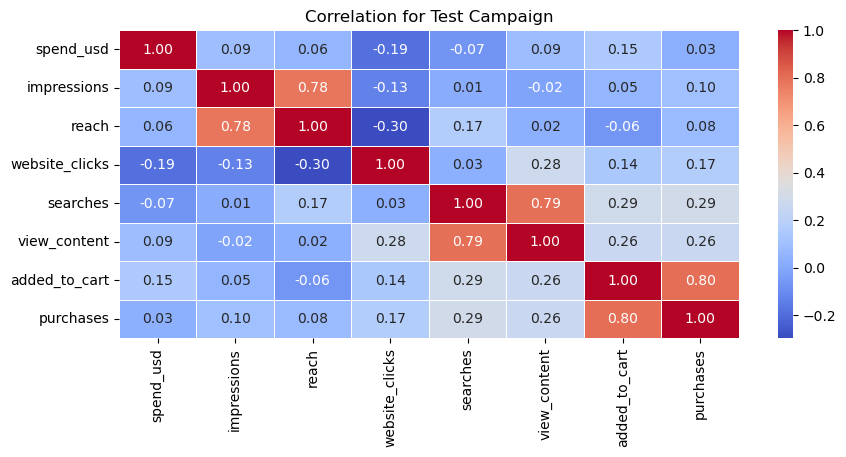

In [37]:
#test for correlation for Test Campaign
correlation_matrix = test.corr(numeric_only=True)

plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidth=".5")
plt.title("Correlation for Test Campaign")
plt.show()

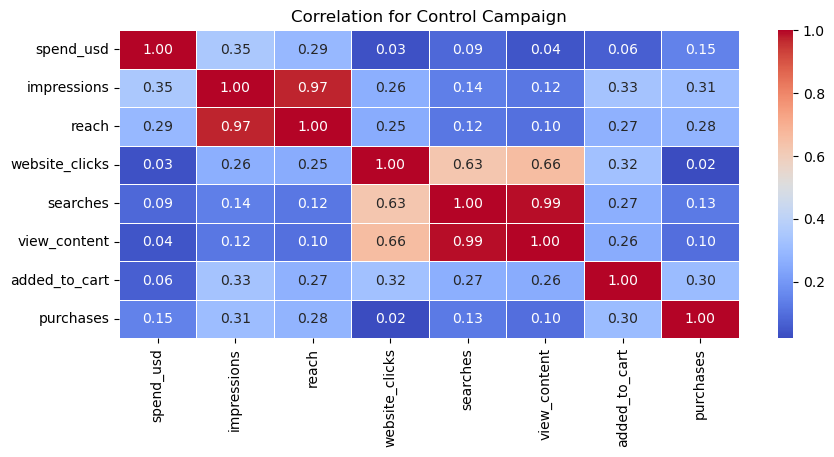

In [38]:
#test for correlation for Control Campaign

correlation_matrix = control.corr(numeric_only = True)

plt.figure(figsize=(10, 4))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidth=".5", cmap="coolwarm")

plt.title("Correlation for Control Campaign")
plt.show()

Based on the correlation matrices above it can be observed that for the test campaign there is a strong correlation between users adding items to cart and the number of users making purchases. However, that correlation is much lower in the control campaign.

<Axes: xlabel='campaign_name', ylabel='purchases'>

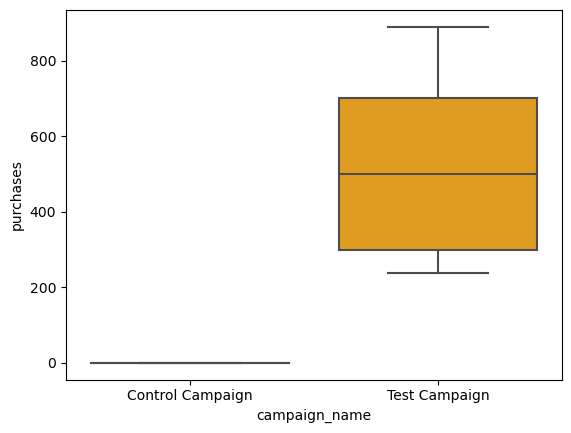

In [39]:
sns.boxplot(y="purchases", x = "campaign_name", data=campaigns, color="orange")

Text(0.5, 0, 'purchases')

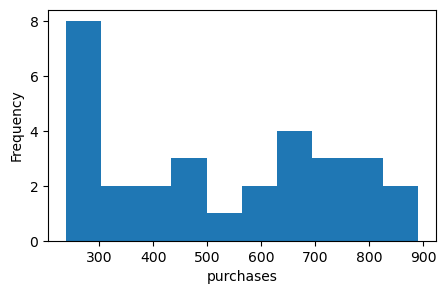

In [40]:
ax = test["purchases"].plot.hist(figsize=(5, 3))
ax.set_xlabel("purchases")

Text(0.5, 0, 'purchases')

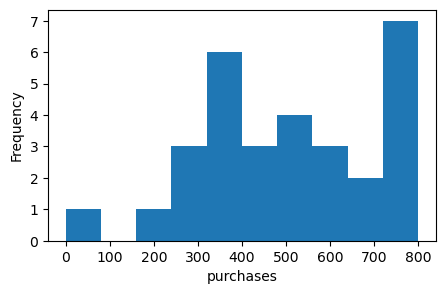

In [41]:
ax = control["purchases"].plot.hist(figsize=(5, 3))
ax.set_xlabel("purchases")

Text(0, 0.5, 'Purchases')

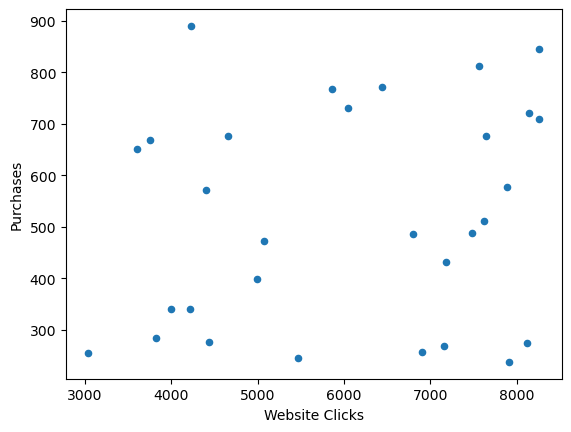

In [42]:
ax = test.plot.scatter(x="website_clicks", y="purchases", )
ax.set_xlabel("Website Clicks")
ax.set_ylabel("Purchases")

Text(0, 0.5, 'Purchases')

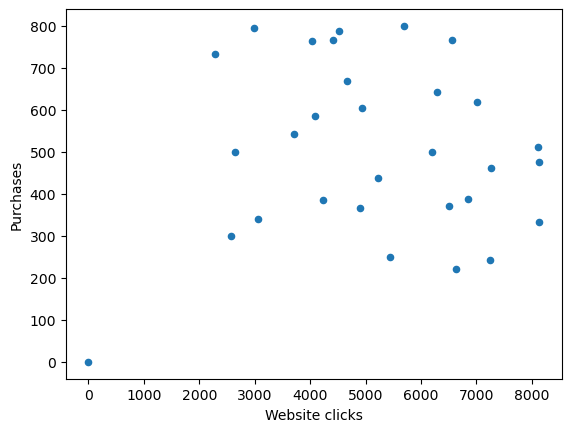

In [43]:
ax = control.plot.scatter(x="website_clicks", y="purchases")
ax.set_xlabel("Website clicks")
ax.set_ylabel("Purchases")

Text(0, 0.5, 'purchases')

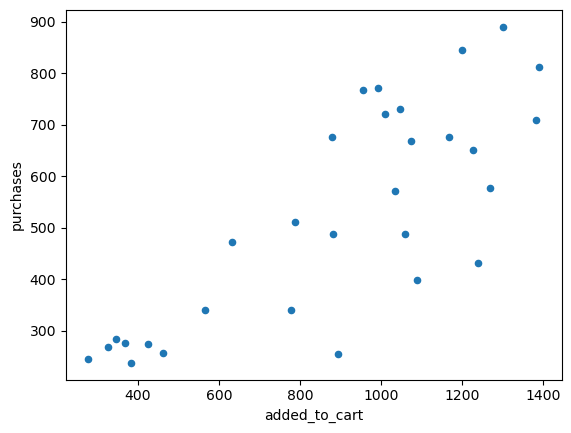

In [44]:
ax = test.plot.scatter(x="added_to_cart", y="purchases")
ax.set_xlabel("added_to_cart")
ax.set_ylabel("purchases")

Text(0.5, 0, 'Added to cart')

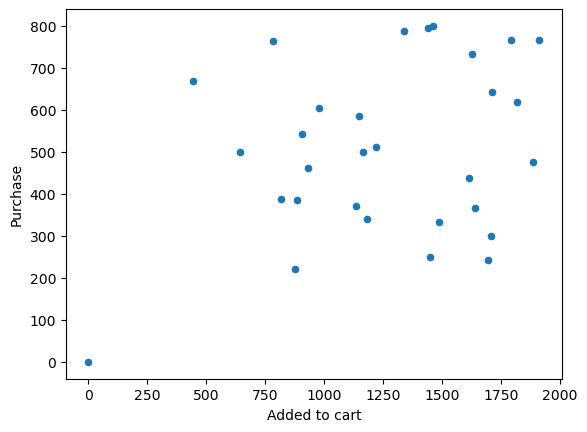

In [45]:
ax = control.plot.scatter(x="added_to_cart", y="purchases")
ax.set_ylabel("Purchase")
ax.set_xlabel("Added to cart")

## Probability

In [46]:
# Calculate probability of converting website clicks to purchases regardless of ad campaign

total_website_clicks = campaigns["website_clicks"].sum()
total_purchases = campaigns["purchases"].sum()


converted = total_purchases / total_website_clicks

converted

0.046639604143489034

In [47]:
# Calculate probablity of converting website clicks to purchases in the control campaign

control_website_clicks = control["website_clicks"].sum()
control_purchases = control["purchases"].sum()

control_converted = control_purchases / control_website_clicks

converted

0.046639604143489034

In [48]:
# Calculate probablity of converting website clicks to purchases in the test campaign

test_website_clicks = test["website_clicks"].sum()
test_purchases = test["purchases"].sum()

test_converted = test_purchases / test_website_clicks

converted

0.046639604143489034

In [49]:
# Calculate probability that a website click was from the test campaign

test["impressions"].sum() / campaigns["impressions"].sum()

0.4132292059303643

### Probablity Conclusion

The probability of a website visitor making a purchase for the control campaign is ~9.19%. The probability of a website visitor making a purchase for the test campaign is ~8.64% which is lower than the control campaign. Combined with the fact that the probability that the ad shown to an individual was from the test campaign is ~41.32% this would lead me to conclude that the test campaign does not lead to more purchases.

## Hypothesis Testing

In [50]:
# Total number of purchases for the control campaign
control_purchases = control["purchases"].sum()

# Total number of purchases for the test campaign
test_purchases = test["purchases"].sum()

# Total number of website visits associated with the control campaign
n_control = control["website_clicks"].sum()

# Total number of website visits associated with the test campaign
n_test = test["website_clicks"].sum()


print(f'Control Purchases: {control_purchases}')
'\n'
'\n'
print(f'Test Purchases: {test_purchases}')
print(f'Control Web Visits: {n_control}')
print(f'Test Web Visits: {n_control}')

Control Purchases: 15161
Test Purchases: 15637
Control Web Visits: 154303
Test Web Visits: 154303


In [51]:
# Test for proportions based on normal (z) test

count = np.array([test_purchases,control_purchases])
nobs = np.array([n_test, n_control])

z_score, p_val = sm.stats.proportions_ztest(count, nobs, alternative="larger")

print(f'Z-score: {z_score:.3f}')
print(f'P_Val: {p_val:.3f}')



Z-score: -11.839
P_Val: 1.000


The z-score is -11.839

The p-value is 1.000



The p-value is the probability of getting a result equal or more extreme than the observed statistic. The closer to 0 the p-value is, the more statistically significant the results are. The closer to 1 the p-value is, the less statistically significant the results are.

Therefore, with the p-value from above being equal to 1.0 and the Type 1 error rate of 0.05 it means that there is no statistically significant difference between the the test and control campaigns and therefore we should fail to reject the null hypothesis.

Also, the z-score represents how the observed value relates to the mean of the null and alternative hypotheses. It is measured in terms of standard deviations from the mean. Therefore, the z-score of -11.839 shows that the observed statistic is 11.839 standard deviations below the mean.

In [69]:
p_diffs = [] # Create empty array to store diff values from simulation

# Adding the differences of the 100,000 simulations to the p_diffs array

p_diffs.append(
    (np.random.binomial(n_test, converted, 100000) / n_test) - (np.random.binomial(n_control, converted, 100000) / n_control)
)

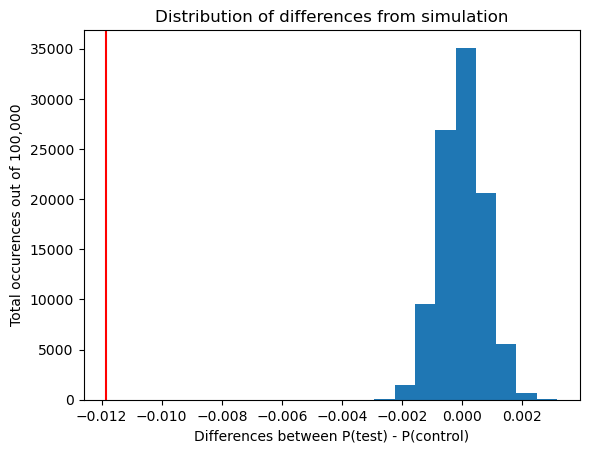

In [70]:
# Calculate observed difference in conversion from data
obs_diff = test_converted - control_converted

# Plot histogram

plt.hist(p_diffs) # Shows all p_diffs from the 100,000 simulations. Shows as normal distribution as expected
plt.axvline(x = obs_diff, color="red")
plt.title('Distribution of differences from simulation')
plt.xlabel('Differences between P(test) - P(control)')
plt.ylabel('Total occurences out of 100,000');

In [71]:
p_value = (p_diffs > conversion_diff).mean()

print(p_value)
print(obs_diff)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

After the simulation the ```p_value``` is the same as the p_value calculated above using the ``` z test```. Also, in the histogram we can see that the observed difference aligns with the ```z-score``` value calculated above as well. All of this confirms that we should fail to reject the null hypothesis.



## Conclusion

### Hypotheses

**Null hypothesis**: The conversion rate for the test campaign is equal to or less than the conversion rate for the control campaign.

**Alternative hypothesis**: The conversion rate for the test campaign is greater than the conversion rate for the control campaign.

Conversion rate for this analysis will be defined as the number of purchases divided by the number of website clicks.

Type 1 error rate of 5%

### Conclusions from analysis

After analyzing the data based on the hypotheses and Type 1 error rate, I have to fail to reject the null hypothesis. This means there is not a statistical significance in the conversion rate for the test campaign and the control campaign.

An interesting observation is that the test campaign showed a higher correlation to users adding items to the cart and the number of purchases as compared to the control campaign.

### Recommendations

Due to the average spend of each campaign and that we failed to reject the null hypothesis, it is recommended to choose the control campaign over the test campaign.
The test campaign did show a higher correlation to users adding items to the cart and completing purchases, so I recommend a deeper analysis into the specific features or strategies implemented in the test campaign.